# Why is my banana glowing?

## (modeling a system that evolves in time)

## Student names

Work in pairs, and put the names of both people in your group here!  (If you're in a group of 3, just move your chairs so you can work together.)

## Learning Goals (Why are we asking you to do this?)

Lots of systems (physical, biological, economic, social, etc...) evolve in time, and you have to figure out how to change things at the next time based on what happened before.  Today, we're doing that using radioactivity and compare our models to some data.  This type of modeling is going to make us think about:

* How to make a system move forward in time using loops
* How to work with numpy arrays to do interesting and useful things
* How to think about a model in relation to experimental data, and to decide if your model isn't quite good enough  (ooh!  foreshadowing!)



<img src="https://whatisnuclear.com/articles/radioactive.png" alt="ooh, shiny!" style="width: 250px;"/>

The word "radioactivity" conjures up many images - perhaps a nuclear reactor (or a nuclear reactor accident, such as Fukushima...), or perhaps MSU's very own [National Superconducting Cylotron Laboratory](http://www.nscl.msu.edu/), or NSCL.  What the word "radioactivity" refers to is particles that are emitted from the nuclei of some atoms, which are unstable due to the fundamental properties of the nucleus.  Depending on the nucleus, the particles emitted can be highly energetic photons, electrons, or 'alpha particles' (helium nuclei).

Not all nuclei are radioactive; many elements, like normal hydrogen ($^1\mathrm{H}$) or carbon ($^{12}\mathrm{C}$), are extremely stable, and their nuclei do not spontaneously emit particles.  However, isotopes of these elements *are* radioactive -- $^3\mathrm{H}$, or tritium, is a hydrogen atom with two extra neutrons in the nucleus, and which has a "half-life" of 12.32 years, and $^{14}\mathrm{C}$, the isotope of carbon used to estimate the ages of old artifacts by archeologists using a technique called [carbon dating](https://en.wikipedia.org/wiki/Radiocarbon_dating), has a "half-life" of 5,730 years.  The "half-life" is the time that it takes for half of a sample of that element to decay.  In other words, if you start out with a number of atons of $^{14}\mathrm{C}$ equal to $N_0$, after some amount of time t you would have:

$N(t) = N_0 2^{-\frac{t}{t_{1/2}}}$

left, where $t_{1/2}$ in this equation is the half-life of $^{14}\mathrm{C}$, 5,730 years.  Radioactive isotopes have a [tremendous range of half-lives](https://en.wikipedia.org/wiki/List_of_radioactive_isotopes_by_half-life), with values measured from around $10^{-23}$ seconds to more than $10^{22}$ years!  The study of these isotopes - which ones can and can't decay, how long they take to decay, and what they produce when they *do* decay - can tell you a tremendous amount about the basic properties of matter (take a tour of the NSCL some time and you'll hear all about it!)

Also, it's worth noting that radioactivity is naturally occurring, and plenty of things that you interact with in everyday life are a little bit radioactive.  A relatively common isotope of potassium is radioactive, so anything that contains potassium - like bananas! - creates detectable amounts of radioactivity.  There are also radioactive isotopes in granite (which is used to make floors, counter tops, and lots of other things), cigarettes, the clay in kitty litter, and a lot of types of old pottery and glassware.


You happen to be wandering down a dark alley just north of campus after the bars close on a Friday.  A mysterious man gives you a chunk of some material of unknown properties.  He tells you that it is "kinda radioactive, maybe", but that it's very late and he just woke up in this alley.  You can't help but notice that it's warm to the touch, and it has a lovely green glow.  By the time you look up, he has disappeared in a puff of smoke.  You clearly can't give the sample back to him, but don't think it's safe to leave it in the alley.

For the moment, let's assume that it has a half-life $t_{s}$ (which you'll determine later) and you have 1 kg of it. 

**First, work out some things on the whiteboard:**  

1. How much of a sample of material should be remaining after T seconds?  
2. How many decays should there be per second *at that time*?

Hint: $\frac{d}{dx} 2^x = 2^x \mathrm{ln}(2)$, and don't forget the chain rule!

**Check with an instructor before you move on!**

**SOLUTIONS:**

For \#1, this is basically just plug-and-chug with \#1 above:  $N(T) = N_0 2^{-\frac{T}{t_{1/2}}}$ (where T = time)

For \#2, this is equal to:

$\mathrm{\# decays} = -\frac{dN}{dt} =  \frac{N_0}{t_{1/2}}   2^{-\frac{T}{t_{1/2}}} \log(2)  $

(but took some hand-holding to get there...)

**Next:** make two plots, one with the amount of time that should be remaining as a function of time, and a second with the expected decays per second as a function of time!

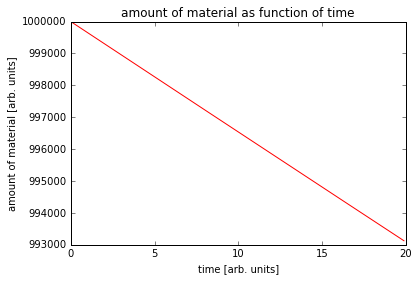

In [12]:
# put your code here!  add additional cells if necessary.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t_half = 2000.0   # arbitrary units
N_0 = 1.0e+6   # arbitrary units

time = np.arange(0.0,20.0,0.1)
N_of_t = N_0 * 2.0**(-time/t_half)
decay_rate = N_0/t_half *np.log(2.0)*2.0**(-time/t_half)

plt.plot(time,N_of_t,'r-')
plt.title("amount of material as function of time")
plt.ylabel("amount of material [arb. units]")
plt.xlabel("time [arb. units]")

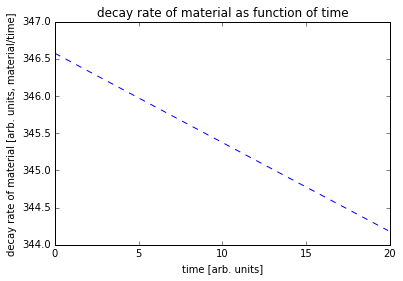

In [13]:
plt.plot(time, decay_rate, 'b--')
plt.title("decay rate of material as function of time")
plt.ylabel("decay rate of material [arb. units, material/time]")
plt.xlabel("time [arb. units]")

When you get home, you ask your roommate, who conveniently happens to work in a nuclear chemistry lab, to measure some of its properties.  When she comes home that night, she says that she managed to purify the sample and measure its radioactive decay rate (which is to say, the number of decays over some period of time) and the total amount of stuff as a function of time.  Since you have to use two different machines to do that, it's in two different files.  She also mentions that she didn't have time to do any more because somebody else in the lab had forgotten to clean out the two machines, so she had to do a quick cleanup job before making the measurements.

In [14]:
# this block of code reads in the data files.  Don't worry too much about how they 
# work right now -- we'll talk about that in a few weeks!
import numpy as np

# count_times = the time since the start of data-taking when the data was taken (in seconds)
# count_rate = the number of counts since the last time data was taken, at the time in count_times
count_times = np.loadtxt("count_rates.txt", dtype=int)[0]
count_rates = np.loadtxt("count_rates.txt", dtype=int)[1]

# sample_times = the time since the start of data-taking when the sample was measured
# sample_amounts = the number of atoms left of the mysterious material at the time in sample_times
sample_times = np.loadtxt("sample_amount.txt", dtype=int)[0]
sample_amounts = np.loadtxt("sample_amount.txt", dtype=int)[1]


**Using the four numpy arrays created in the cell above,** plot the measured count rates as a function of time and, on a separate plot, plot the measured sample amounts as a function of time.  What do you notice about these plots, compared to the ones from your analytic estimate?  Also, if you inspect the data, approximately what is the initial amount of sample and the half-life?

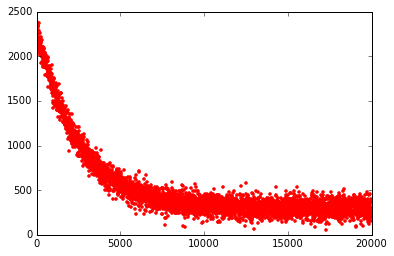

In [18]:
# put your code here!  add additional cells if necessary.

plt.plot(count_times, count_rates,'r.')
plt.plot(time,decay_rate*5.0,'b--')

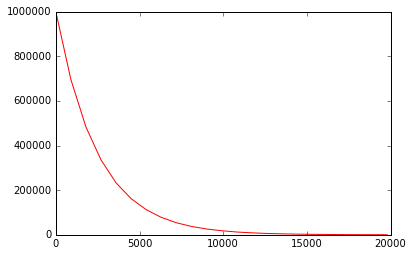

In [16]:
plt.plot(sample_times, sample_amounts,'r-')

**STUDENTS SHOULD OBSERVE:**  the count rate plot should seem really noisy, but the amount plot doesn't look nearly as noisy (however, if students look closely they'll see some jitter in the sample amount plot).  This is different than the ideal plots, which are very smooth.  The initial amount of stuff is 1 million (in arbitrary units) and the half-life reading off the plot (i.e., delta_t between when it goes from 1 million to 500K on the plot is somewhere around 2000 seconds (it's really 1712 seconds).

**Next, using just the count rates and the measured initial amount of the substance** (i.e., just the array count_rates and the first value in sample_amounts), estimate what the amount of sample should be as a function of time.  Make a plot of this.  (Note: you should work your model out on the whiteboard first!)

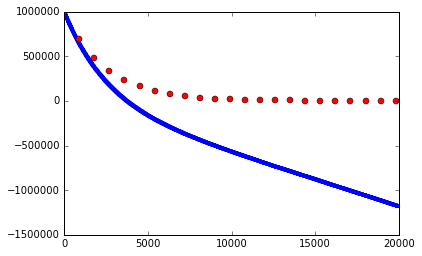

In [17]:
# put your code here!  add additional cells if necessary.

'''
The plan here is to start with 
'''
est_amount = np.zeros_like(count_times)


est_amount[0] = sample_amounts[0] 


for i in range(1,count_times.size-2):
    est_amount[i] = est_amount[i-1] - count_rates[i-1] 
    
# wow, that sure looks bad, doesn't it?
plt.plot(count_times,est_amount,'b.')   # this is the estimate
plt.plot(sample_times, sample_amounts,'ro')  # this is the actual sample

**Based on the plot in the previous cell,** what do you think is going on?

The model doesn't take into account noise, but the actual counts in the data have noise in them - therefore, we're over-estimating how much the whole dataset should decrease.  The background noise most likely comes from the machine not being cleaned out!

**How might you modify your model** to emulate this behavior?

We could try to figure out what the average noise level is at late times and subtract that from the count rate. Assuming the background noise is pretty constant, that should be fine.

## Feedback on this assignment

**What questions** do you (or does your group) have after completing this model?

*Put your answer here!*

## How to submit this assignment

Log into the course Desire2Learn website (d2l.msu.edu) and go to the "In-class assignments" folder.  There will be a dropbox labeled "Day 5".  Upload this notebook there (but not pictures of drawings, etc.).  You only have to upload one notebook per group - just make sure that everybody's name is at the top of the notebook! 